# Question

 This week we tackle the curse of dimensionality and reduce the time that cars spend on the test bench. We will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

We have training and test datasets separately. The data has been anonymised and there is target, called ‘y’ but we will not be training a supervised model in this assignment (you are still free and encouraged to do that for the sake of practice).

- Download, load and clean the data. Do not forget to normalize it.
- Perform a principle component analysis (PCA). How many components will you choose based on an explained variance ratio of your choice? Plot the proportion of explained variance and the number of components.
- One downside of PCA is that it maps all the original features to a lower dimensional space, resulting in less interpretable features. Let’s say we want to use the result of the PCA but still work with the original features. Here is what we can do. Using the selected number of components from 2), find which features of the original data have the highest absolute correlation with each of the components. Select features with absolute correlation with the PCA components of at least 0,75. How many and which features will you end up with?

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.<br>

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.<br>

<b>File descriptions</b><br>
Variables with letters are categorical. Variables with 0/1 are binary values.

- train.csv - the training set
- test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file

In [43]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Data Preview

In [44]:
# load datasets
df_train = pd.read_csv("train.csv")
df_test = pd. read_csv("test.csv")

In [45]:
# preview train set
print('Train Dataset: ',df_train.shape)
df_train.head()

Train Dataset:  (4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# preview test data
print('Test Data Shape: ',df_test.shape)
df_test.head()

Test Data Shape:  (4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
# check train dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


We have 369 integer columns, 1 float column and 8 categorical columns. We will do encoding for the categorical columns.


# Data Cleaning

In [48]:
# checking missing values in dataset
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())

0
0


In [49]:
# check for any duplicated entries
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


# Preprocessing

In [50]:
# Separate features from target 'y'
X = df_train.drop(columns=['y'])
y = df_train['y']

In [51]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [53]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA

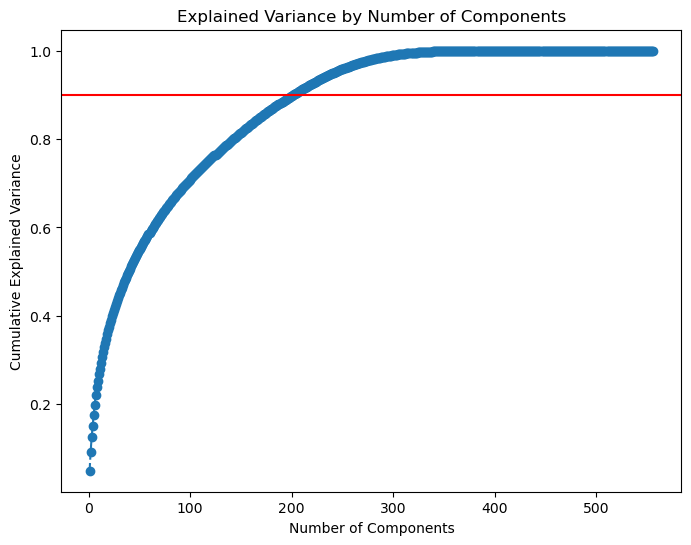

Selecting 201 components to explain 90% variance.


In [54]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# let us go with 90% explained variance
plt.axhline(y=0.90, color='r', linestyle='-') 
plt.show()

# Select the number of components that explain ~90% of the variance
n_components = next(x[0] for x in enumerate(cumulative_variance) if x[1] > 0.90)
print(f'Selecting {n_components} components to explain 90% variance.')


In [55]:
# fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca_selected = pca.fit_transform(X_scaled)

# Get the PCA components
components = pd.DataFrame(pca.components_, columns=X.columns)

# Calculate the correlation between original features and PCA components
correlation_matrix = components.T.corrwith(pd.Series(X_pca_selected.flatten()), axis=1).abs()

# Select features with correlation above the threshold (0.75 in this case)
high_corr_features = correlation_matrix[correlation_matrix >= 0.75].index
print(f"Number of features selected: {len(high_corr_features)}")
print(f"Selected features: {high_corr_features.tolist()}")


Number of features selected: 3
Selected features: ['X204', 'X205', 'X5_u']


We get three highly correlated features. The dataset will be possibly reduced to three columns namely: 'X204', 'X205', 'X5_u'. This is when we go by the 0.75 correlation and 90% variance.